In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
data = 'data\data_hep - data_hep.csv'

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Darsh\AppData\Local\Temp\ipykernel_30420\3868482172.py:1: SyntaxWarning: invalid escape sequence '\d'
  data = 'data\data_hep - data_hep.csv'


In [ ]:
df = pd.read_csv(data) # 70606 rows × 61 columns

# get the headers
headers = df.columns.tolist()

# df['type'].value_counts()



### Correlation Matrix

$$ρ_{ij} = \frac{Cov(X_i, X_j)}{σ_{X_i} σ_{X_j}}$$

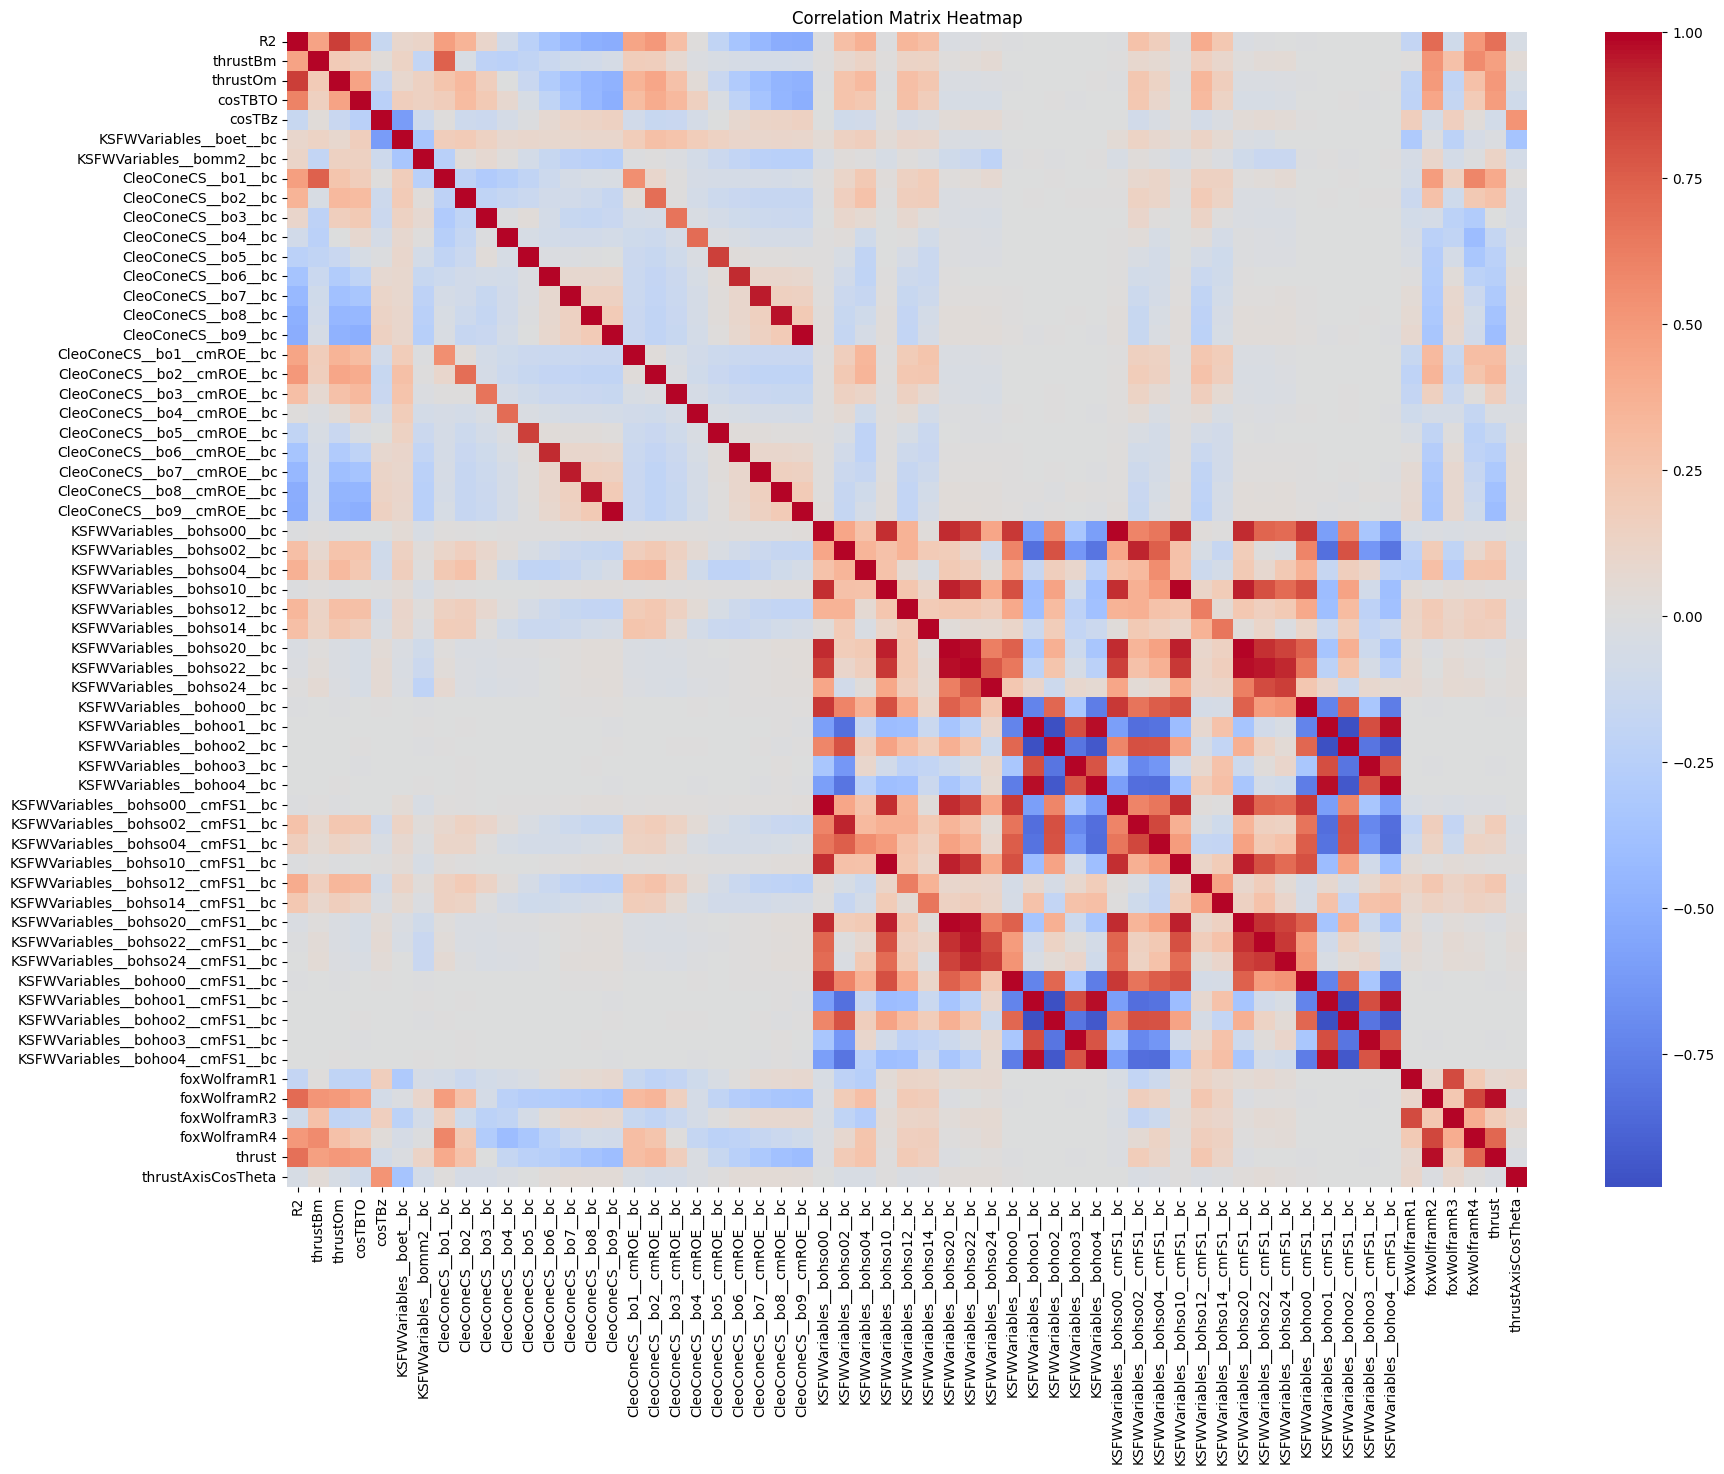

In [19]:
features = df.drop(columns=['index', 'type'])
corr_matrix = features.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [16]:
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]

high_corr = corr_pairs[abs(corr_pairs) > 0.9]

print(high_corr)

KSFWVariables__bohoo0__cmFS1__bc   KSFWVariables__bohoo0__bc            1.00000
KSFWVariables__bohoo0__bc          KSFWVariables__bohoo0__cmFS1__bc     1.00000
KSFWVariables__bohso00__cmFS1__bc  KSFWVariables__bohso00__bc           1.00000
KSFWVariables__bohso00__bc         KSFWVariables__bohso00__cmFS1__bc    1.00000
KSFWVariables__bohso20__bc         KSFWVariables__bohso20__cmFS1__bc    1.00000
                                                                         ...   
KSFWVariables__bohoo1__bc          KSFWVariables__bohoo2__cmFS1__bc    -0.97784
KSFWVariables__bohoo1__cmFS1__bc   KSFWVariables__bohoo2__bc           -0.97784
KSFWVariables__bohoo1__bc          KSFWVariables__bohoo2__bc           -0.97784
KSFWVariables__bohoo2__bc          KSFWVariables__bohoo1__cmFS1__bc    -0.97784
                                   KSFWVariables__bohoo1__bc           -0.97784
Length: 78, dtype: float64


In [18]:
# Correlation matrix
corr_matrix = features.corr().abs()

# Upper triangle (ignore duplicate pairs)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Drop features with correlation > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Highly correlated features to drop:")
to_drop

# reduced_features = features.drop(columns=to_drop)

Highly correlated features to drop:


['CleoConeCS__bo6__cmROE__bc',
 'CleoConeCS__bo7__cmROE__bc',
 'CleoConeCS__bo8__cmROE__bc',
 'CleoConeCS__bo9__cmROE__bc',
 'KSFWVariables__bohso10__bc',
 'KSFWVariables__bohso20__bc',
 'KSFWVariables__bohso22__bc',
 'KSFWVariables__bohoo2__bc',
 'KSFWVariables__bohoo4__bc',
 'KSFWVariables__bohso00__cmFS1__bc',
 'KSFWVariables__bohso02__cmFS1__bc',
 'KSFWVariables__bohso10__cmFS1__bc',
 'KSFWVariables__bohso20__cmFS1__bc',
 'KSFWVariables__bohso22__cmFS1__bc',
 'KSFWVariables__bohso24__cmFS1__bc',
 'KSFWVariables__bohoo0__cmFS1__bc',
 'KSFWVariables__bohoo1__cmFS1__bc',
 'KSFWVariables__bohoo2__cmFS1__bc',
 'KSFWVariables__bohoo3__cmFS1__bc',
 'KSFWVariables__bohoo4__cmFS1__bc',
 'thrust']